In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Input, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization, Activation


In [ ]:
train_path = r'/content/drive/MyDrive/train'
test_path = r'/content/drive/MyDrive/test'

In [ ]:
class_dict = {'benign':0,'malignant':1}
print(class_dict)

{'benign': 0, 'malignant': 1}


In [ ]:
for i in os.listdir(train_path):
  x = os.path.join(train_path,i)
  print(x)

/content/drive/MyDrive/train/malignant
/content/drive/MyDrive/train/benign


In [ ]:
images = []
labels = []
for i in os.listdir(train_path):
  images_path = os.path.join(train_path,i)
  print(images_path)
  class_label = class_dict[i]
  print(i,class_label)

/content/drive/MyDrive/train/malignant
malignant 1
/content/drive/MyDrive/train/benign
benign 0


In [ ]:
for i in os.listdir(train_path):
  images_path = os.path.join(train_path,i)   # subfolder complete path
  class_label = class_dict[i]

  for j in os.listdir(images_path):          #
    img_comp_path = load_img(os.path.join(images_path,j))  # fetches complete  path of each and very image from the subfolder
    imgs = img_to_array(img_comp_path)/255      # normalizing
    print(img_comp_path)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7CF32A52B940>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7CF32A05C100>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7CF32A05C160>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7CF32A05C130>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7CF32A05C160>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7CF32A05C2B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7CF32A05C100>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7CF32A05C1F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7CF32A05C310>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7CF32A05C1F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7CF32A05C070>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7CF32A05C220>
<PIL.JpegImagePl

In [ ]:
def return_data_and_labels(path):
  images = []
  labels = []
  for i in os.listdir(path):
    subfolder_comp_path = os.path.join(path,i)
    class_label = class_dict[i]

    for j in os.listdir(subfolder_comp_path):
      img_comp_path = load_img(os.path.join(subfolder_comp_path,j),target_size=(128,128))
      img = img_to_array(img_comp_path)/255
      images.append(img)
      labels.append(class_label)

  return np.array(images),np.array(labels)



In [ ]:
df_train = pd.DataFrame({'Class': labels, 'Image': images})

In [ ]:
return_data_and_labels(test_path)

(array([[[[0.25490198, 0.12941177, 0.08627451],
          [0.30588236, 0.16078432, 0.1254902 ],
          [0.36862746, 0.2       , 0.16470589],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.00392157, 0.        ],
          [0.        , 0.00784314, 0.00392157]],
 
         [[0.30588236, 0.16078432, 0.1254902 ],
          [0.35686275, 0.2       , 0.16078432],
          [0.41960785, 0.24705882, 0.20392157],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.37254903, 0.20392157, 0.16862746],
          [0.42352942, 0.23921569, 0.2       ],
          [0.47058824, 0.28235295, 0.22745098],
          ...,
          [0.00392157, 0.        , 0.        ],
          [0.00392157, 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.43137255, 0.21960784, 0.17254902],
          [0.44705

In [ ]:
df_test = pd.DataFrame({'Class': labels, 'Image': images})

In [ ]:
x_train,y_train = return_data_and_labels(train_path)
print(x_train.shape)
print(y_train.shape)

(2637, 128, 128, 3)
(2637,)


In [ ]:
x_test,y_test = return_data_and_labels(test_path)
print(x_test.shape)
print(y_test.shape)

(660, 128, 128, 3)
(660,)


In [ ]:
### Exploratory Data Analysis

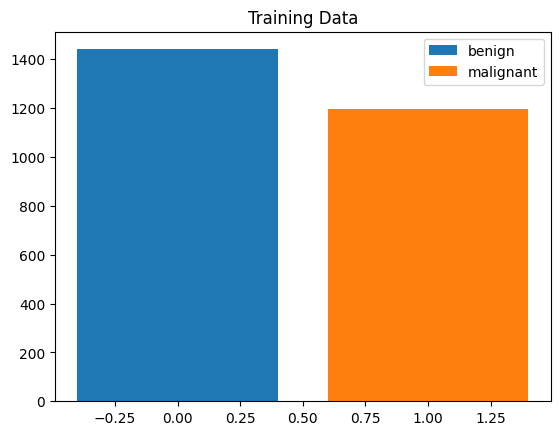

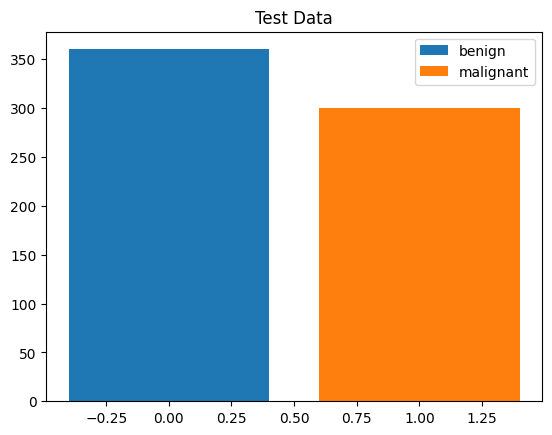

In [ ]:
plt.bar(0, y_train[np.where(y_train == 0)].shape[0], label = 'benign')
plt.bar(1, y_train[np.where(y_train == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Training Data")
plt.show()

plt.bar(0, y_test[np.where(y_test == 0)].shape[0], label = 'benign')
plt.bar(1, y_test[np.where(y_test == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Test Data")
plt.show()

In [ ]:
random_idx = np.random.randint(0,x_train.shape[0],25)
print(random_idx)
print(type(random_idx))

[1734 1258  577 2239  813  944   65 1825   78 2588  287  482  972  724
  129   74  404  650 1639 1717 1037  146 2252  812  842]
<class 'numpy.ndarray'>


In [ ]:
class_dict

{'benign': 0, 'malignant': 1}

In [ ]:
class_dict_rev = {j:i for i,j in class_dict.items()}
print(class_dict_rev)

{0: 'benign', 1: 'malignant'}


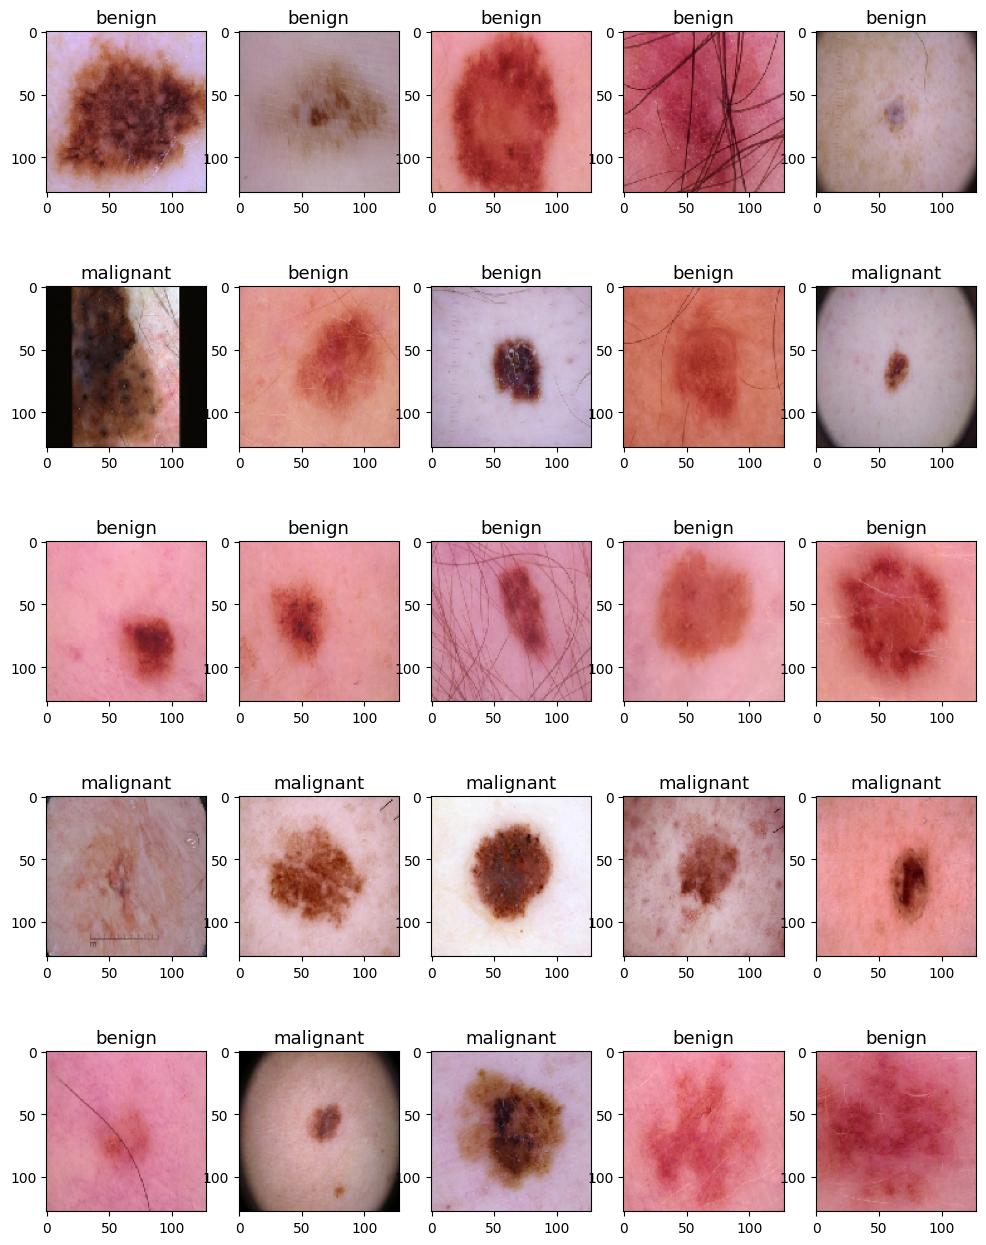

In [ ]:
#CHECKING BENIGN AND MALIGANT IMAGES IN TRAIN DATA
plt.figure(figsize=(12,16))
random_idx = np.random.randint(0,x_train.shape[0],25)
for i in range(len(random_idx)):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[random_idx[i]])
  plt.title(f'{class_dict_rev[y_train[random_idx[i]]]}',fontsize=13)
plt.show()

In [ ]:
from collections import Counter

In [ ]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 1440, 1: 1197})
Counter({0: 360, 1: 300})


In [ ]:
#CALL BACK

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:

def configure_early_stopping():
    # Configure Early Stopping Callback
    early_stopping = EarlyStopping(
        monitor='val_loss',    # Metric to monitor for improvement
        patience=8,            # Number of epochs with no improvement after which training will stop
        min_delta=1e-7,        # Minimum change in the monitored quantity to qualify as improvement
        restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
    )
    return early_stopping

# Usage:
early_stopping_callback = configure_early_stopping()

In [ ]:
#### PREPARING CNN MODEL
#### CNN Model
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='valid', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy'
              , optimizer = 'Adamax', metrics='binary_accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 16)      64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 126, 126, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 32)        1

In [ ]:
h1 = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,callbacks=[early_stopping_callback])

Epoch 1/30
83/83 [==============================] - 12s 41ms/step - loss: 0.6529 - binary_accuracy: 0.7691 - val_loss: 1.7530 - val_binary_accuracy: 0.5455
Epoch 2/30
83/83 [==============================] - 2s 27ms/step - loss: 0.4092 - binary_accuracy: 0.8028 - val_loss: 2.6188 - val_binary_accuracy: 0.5455
Epoch 3/30
83/83 [==============================] - 2s 28ms/step - loss: 0.3899 - binary_accuracy: 0.8153 - val_loss: 1.5183 - val_binary_accuracy: 0.5485
Epoch 4/30
83/83 [==============================] - 2s 29ms/step - loss: 0.3657 - binary_accuracy: 0.8225 - val_loss: 1.1883 - val_binary_accuracy: 0.6515
Epoch 5/30
83/83 [==============================] - 2s 26ms/step - loss: 0.3490 - binary_accuracy: 0.8339 - val_loss: 0.6564 - val_binary_accuracy: 0.7848
Epoch 6/30
83/83 [==============================] - 2s 25ms/step - loss: 0.3351 - binary_accuracy: 0.8419 - val_loss: 0.6974 - val_binary_accuracy: 0.7939
Epoch 7/30
83/83 [==============================] - 2s 24ms/step - lo

In [ ]:
# TRANSFER LEARNING

In [ ]:
base_model = tensorflow.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(128,128, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():

    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(128,128, 3))

    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[inputs], outputs=output)

    return model

234545216/234545216 [==============================] - 12s 0us/step


In [ ]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 4, 4, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [ ]:
history = model_pretrained.fit(x_train,y_train,
                    batch_size = 64,
                    epochs = 20,
                    validation_data=(x_test,y_test),
                    verbose = 1,
                    callbacks=[early_stopping_callback]

                    )

Epoch 1/20
42/42 [==============================] - 27s 331ms/step - loss: 0.7012 - binary_accuracy: 0.5639 - val_loss: 0.6289 - val_binary_accuracy: 0.6561
Epoch 2/20
42/42 [==============================] - 9s 215ms/step - loss: 0.5750 - binary_accuracy: 0.7148 - val_loss: 0.5581 - val_binary_accuracy: 0.7439
Epoch 3/20
42/42 [==============================] - 8s 183ms/step - loss: 0.5145 - binary_accuracy: 0.7626 - val_loss: 0.5197 - val_binary_accuracy: 0.7697
Epoch 4/20
42/42 [==============================] - 8s 192ms/step - loss: 0.4766 - binary_accuracy: 0.7964 - val_loss: 0.4976 - val_binary_accuracy: 0.7773
Epoch 5/20
42/42 [==============================] - 8s 185ms/step - loss: 0.4526 - binary_accuracy: 0.8062 - val_loss: 0.4799 - val_binary_accuracy: 0.7833
Epoch 6/20
42/42 [==============================] - 9s 219ms/step - loss: 0.4356 - binary_accuracy: 0.8199 - val_loss: 0.4692 - val_binary_accuracy: 0.7894
Epoch 7/20
42/42 [==============================] - 8s 188ms/st

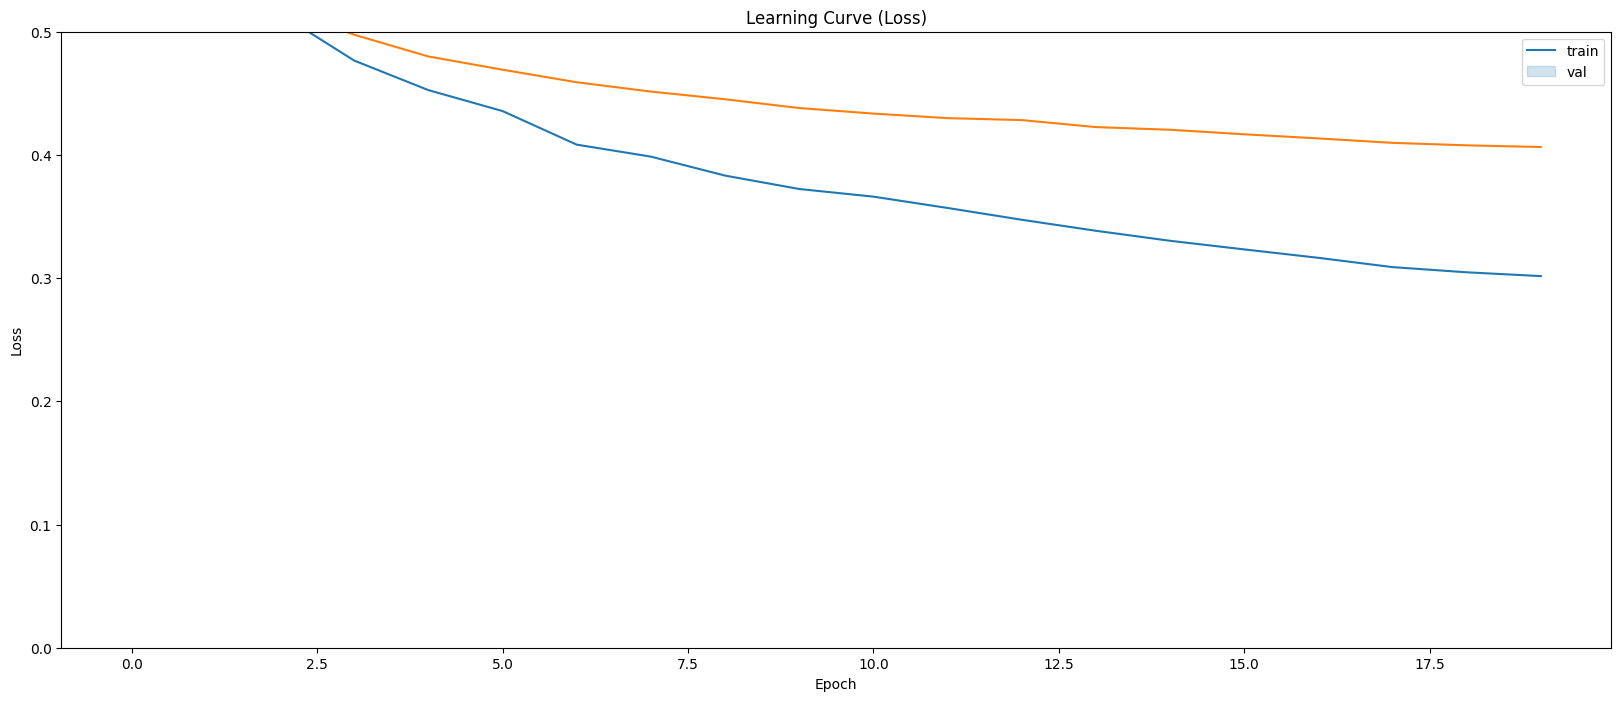

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

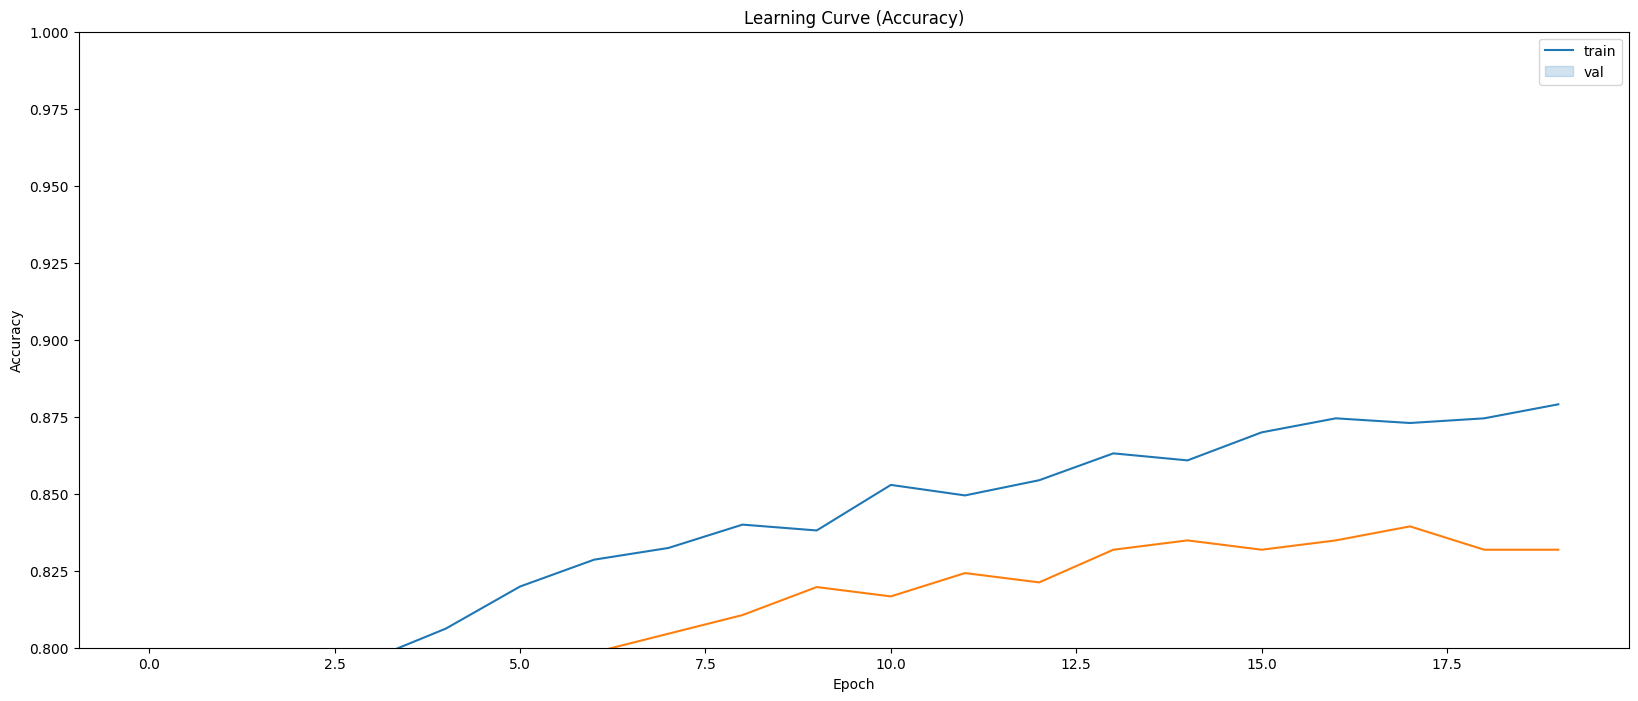

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.3432, Test Accuracy: 0.8470
